# Introdução do tratamento de dados: 

1. Importar as bibliotecas necessárias; 
2. Fazer o primeiro tratamento dos dados necessários;
3. Primeira exposição de dados referente as idades dos pilotos de F1 atuais; 
4. Medidas de dispersão com dados dos pilotos; 
5. Análise técnica e gráficos das equipes de F1.

# 1- Importando as bibliotecas: 

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 

import seaborn as sns 

# 1.1 - Primeira visualização de dados para confirmar se está tudo certo:

In [56]:
drivers = pd.read_csv('drivers.csv') 
results = pd.read_csv('results.csv')  
season = pd.read_csv('seasons.csv') 
races = pd.read_csv('races.csv')
driver_standing = pd.read_csv('driver_standings.csv') 

constructors = pd.read_csv('constructors.csv')

In [3]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [4]:
drivers.columns 

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [5]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [6]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [7]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [8]:
races.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

# Definindo os dados necessários para a análise de idades dos pilotos: 

## Merge em um único dataset para melhor visualização 

In [9]:
ds = pd.merge(results,races[['raceId','year','name','round','date']],on = 'raceId',how = 'left')
ds =pd.merge(ds,drivers[['driverId','driverRef','forename','surname','nationality','dob']],on='driverId',how='left')
pd.get_option("display.max_columns",None)

20

In [10]:
ds

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,statusId,year,name,round,date,driverRef,forename,surname,nationality,dob
0,1,18,1,1,22,1,1,1,1,10.0,...,1,2008,Australian Grand Prix,1,2008-03-16,hamilton,Lewis,Hamilton,British,1985-01-07
1,2,18,2,2,3,5,2,2,2,8.0,...,1,2008,Australian Grand Prix,1,2008-03-16,heidfeld,Nick,Heidfeld,German,1977-05-10
2,3,18,3,3,7,7,3,3,3,6.0,...,1,2008,Australian Grand Prix,1,2008-03-16,rosberg,Nico,Rosberg,German,1985-06-27
3,4,18,4,4,5,11,4,4,4,5.0,...,1,2008,Australian Grand Prix,1,2008-03-16,alonso,Fernando,Alonso,Spanish,1981-07-29
4,5,18,5,1,23,3,5,5,5,4.0,...,1,2008,Australian Grand Prix,1,2008-03-16,kovalainen,Heikki,Kovalainen,Finnish,1981-10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,1,2023,Belgian Grand Prix,12,2023-07-30,ricciardo,Daniel,Ricciardo,Australian,1989-07-01
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,1,2023,Belgian Grand Prix,12,2023-07-30,sargeant,Logan,Sargeant,American,2000-12-31
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,1,2023,Belgian Grand Prix,12,2023-07-30,hulkenberg,Nico,Hülkenberg,German,1987-08-19
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,130,2023,Belgian Grand Prix,12,2023-07-30,sainz,Carlos,Sainz,Spanish,1994-09-01


# Deixando de lado algumas colunas que não vamos utilizar 

In [11]:
ds.drop(['resultId', 'raceId', 'constructorId', 'number','position','positionText','statusId','driverId', 'points', 'grid','positionOrder' ],axis =1,inplace = True)

In [12]:
ds

,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,year,name,round,date,driverRef,forename,surname,nationality,dob
0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,2008,Australian Grand Prix,1,2008-03-16,hamilton,Lewis,Hamilton,British,1985-01-07
1,58,+5.478,5696094,41,3,1:27.739,217.586,2008,Australian Grand Prix,1,2008-03-16,heidfeld,Nick,Heidfeld,German,1977-05-10
2,58,+8.163,5698779,41,5,1:28.090,216.719,2008,Australian Grand Prix,1,2008-03-16,rosberg,Nico,Rosberg,German,1985-06-27
3,58,+17.181,5707797,58,7,1:28.603,215.464,2008,Australian Grand Prix,1,2008-03-16,alonso,Fernando,Alonso,Spanish,1981-07-29
4,58,+18.014,5708630,43,1,1:27.418,218.385,2008,Australian Grand Prix,1,2008-03-16,kovalainen,Heikki,Kovalainen,Finnish,1981-10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,44,+1:43.071,5053521,25,15,1:50.994,227.169,2023,Belgian Grand Prix,12,2023-07-30,ricciardo,Daniel,Ricciardo,Australian,1989-07-01
26076,44,+1:44.476,5054926,37,9,1:50.486,228.213,2023,Belgian Grand Prix,12,2023-07-30,sargeant,Logan,Sargeant,American,2000-12-31
26077,44,+1:50.450,5060900,26,4,1:49.907,229.415,2023,Belgian Grand Prix,12,2023-07-30,hulkenberg,Nico,Hülkenberg,German,1987-08-19
26078,23,\N,\N,9,19,1:53.138,222.864,2023,Belgian Grand Prix,12,2023-07-30,sainz,Carlos,Sainz,Spanish,1994-09-01


# Renomeando as colunas essenciais 

In [13]:
ds.rename(columns = {'rank':'Volta_mais_rapida','name_x':'gp_nome','nationality_x':'país_do_piloto',
                    'name_y':'nome_equipe','nationality_y':'país_equipe','driverRef':'piloto', 'driver' : 'Piloto', 'nationality' : 'país'},inplace = True)
ds

,laps,time,milliseconds,fastestLap,Volta_mais_rapida,fastestLapTime,fastestLapSpeed,year,name,round,date,piloto,forename,surname,país,dob
0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,2008,Australian Grand Prix,1,2008-03-16,hamilton,Lewis,Hamilton,British,1985-01-07
1,58,+5.478,5696094,41,3,1:27.739,217.586,2008,Australian Grand Prix,1,2008-03-16,heidfeld,Nick,Heidfeld,German,1977-05-10
2,58,+8.163,5698779,41,5,1:28.090,216.719,2008,Australian Grand Prix,1,2008-03-16,rosberg,Nico,Rosberg,German,1985-06-27
3,58,+17.181,5707797,58,7,1:28.603,215.464,2008,Australian Grand Prix,1,2008-03-16,alonso,Fernando,Alonso,Spanish,1981-07-29
4,58,+18.014,5708630,43,1,1:27.418,218.385,2008,Australian Grand Prix,1,2008-03-16,kovalainen,Heikki,Kovalainen,Finnish,1981-10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,44,+1:43.071,5053521,25,15,1:50.994,227.169,2023,Belgian Grand Prix,12,2023-07-30,ricciardo,Daniel,Ricciardo,Australian,1989-07-01
26076,44,+1:44.476,5054926,37,9,1:50.486,228.213,2023,Belgian Grand Prix,12,2023-07-30,sargeant,Logan,Sargeant,American,2000-12-31
26077,44,+1:50.450,5060900,26,4,1:49.907,229.415,2023,Belgian Grand Prix,12,2023-07-30,hulkenberg,Nico,Hülkenberg,German,1987-08-19
26078,23,\N,\N,9,19,1:53.138,222.864,2023,Belgian Grand Prix,12,2023-07-30,sainz,Carlos,Sainz,Spanish,1994-09-01


In [14]:
ds['Piloto_nome']=ds['forename']+ ' '+ ds['surname']
ds.drop(['forename','surname'],axis=1,inplace=True)

In [15]:
ds.head()

,laps,time,milliseconds,fastestLap,Volta_mais_rapida,fastestLapTime,fastestLapSpeed,year,name,round,date,piloto,país,dob,Piloto_nome
0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,2008,Australian Grand Prix,1,2008-03-16,hamilton,British,1985-01-07,Lewis Hamilton
1,58,+5.478,5696094,41,3,1:27.739,217.586,2008,Australian Grand Prix,1,2008-03-16,heidfeld,German,1977-05-10,Nick Heidfeld
2,58,+8.163,5698779,41,5,1:28.090,216.719,2008,Australian Grand Prix,1,2008-03-16,rosberg,German,1985-06-27,Nico Rosberg
3,58,+17.181,5707797,58,7,1:28.603,215.464,2008,Australian Grand Prix,1,2008-03-16,alonso,Spanish,1981-07-29,Fernando Alonso
4,58,+18.014,5708630,43,1,1:27.418,218.385,2008,Australian Grand Prix,1,2008-03-16,kovalainen,Finnish,1981-10-19,Heikki Kovalainen


   
   # Aqui na próxima célula definimos a nova coluna "idade" e fizemos um cálculo a partir da coluna já existente "dob" (day of birth) para saber a idade atual do piloto
   
   

In [16]:
pd.to_datetime(ds.dob)
ds['dob'] = pd.to_datetime(ds['dob'])
dates = datetime.today()-ds['dob']
idade = dates.dt.days/365
ds['idade'] = round(idade)

In [17]:
ds

,laps,time,milliseconds,fastestLap,Volta_mais_rapida,fastestLapTime,fastestLapSpeed,year,name,round,date,piloto,país,dob,Piloto_nome,idade
0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,2008,Australian Grand Prix,1,2008-03-16,hamilton,British,1985-01-07,Lewis Hamilton,39.0
1,58,+5.478,5696094,41,3,1:27.739,217.586,2008,Australian Grand Prix,1,2008-03-16,heidfeld,German,1977-05-10,Nick Heidfeld,47.0
2,58,+8.163,5698779,41,5,1:28.090,216.719,2008,Australian Grand Prix,1,2008-03-16,rosberg,German,1985-06-27,Nico Rosberg,38.0
3,58,+17.181,5707797,58,7,1:28.603,215.464,2008,Australian Grand Prix,1,2008-03-16,alonso,Spanish,1981-07-29,Fernando Alonso,42.0
4,58,+18.014,5708630,43,1,1:27.418,218.385,2008,Australian Grand Prix,1,2008-03-16,kovalainen,Finnish,1981-10-19,Heikki Kovalainen,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,44,+1:43.071,5053521,25,15,1:50.994,227.169,2023,Belgian Grand Prix,12,2023-07-30,ricciardo,Australian,1989-07-01,Daniel Ricciardo,34.0
26076,44,+1:44.476,5054926,37,9,1:50.486,228.213,2023,Belgian Grand Prix,12,2023-07-30,sargeant,American,2000-12-31,Logan Sargeant,23.0
26077,44,+1:50.450,5060900,26,4,1:49.907,229.415,2023,Belgian Grand Prix,12,2023-07-30,hulkenberg,German,1987-08-19,Nico Hülkenberg,36.0
26078,23,\N,\N,9,19,1:53.138,222.864,2023,Belgian Grand Prix,12,2023-07-30,sainz,Spanish,1994-09-01,Carlos Sainz,29.0




# Aqui na próxima célula fizemos um novo data frame para mostrar os 20 pilotos mais jovens da F1 com as idades atualizadas para o dia atual. 

## Tambem é possível ver que só existe um brasileiro entre os 20, Pietro Fittipaldi, com 27 anos.  



In [32]:
pilotos_novos = ds.sort_values(by='dob', ascending=False).drop_duplicates(subset='Piloto_nome')[:25]
pilotos_novos = pilotos_novos[['Piloto_nome', 'idade', 'país']]
pilotos_novos = pilotos_novos.reset_index(drop=True)
print(pilotos_novos.to_string(index=False))

       Piloto_nome  idade       país
     Oscar Piastri   23.0 Australian
    Logan Sargeant   23.0   American
      Yuki Tsunoda   23.0   Japanese
      Lando Norris   24.0    British
       Guanyu Zhou   24.0    Chinese
   Mick Schumacher   25.0     German
    Nikita Mazepin   25.0    Russian
      Lance Stroll   25.0   Canadian
    George Russell   26.0    British
   Charles Leclerc   26.0 Monegasque
    Max Verstappen   26.0      Dutch
      Esteban Ocon   27.0     French
 Pietro Fittipaldi   27.0  Brazilian
   Alexander Albon   28.0       Thai
      Pierre Gasly   28.0     French
       Jack Aitken   28.0    British
   Sergey Sirotkin   28.0    Russian
   Nicholas Latifi   28.0   Canadian
     Nyck de Vries   29.0      Dutch
   Pascal Wehrlein   29.0     German
      Carlos Sainz   29.0    Spanish
      Daniil Kvyat   30.0    Russian
Antonio Giovinazzi   30.0    Italian
      Rio Haryanto   31.0 Indonesian
   Kevin Magnussen   31.0     Danish


In [19]:
#definindo alguns atributos para o proximo dataframe
ds["dob"] = pd.to_datetime(ds["dob"])
ds["date"] = pd.to_datetime(ds["date"])

In [20]:
#aqui é apenas para não repetir o mesmo piloto no dataset 
unique_drivers = ds.drop_duplicates(subset='Piloto_nome')

simplified_df = ds[ds['date'].dt.year == 2023][['Piloto_nome', 'idade']]
unique_drivers = simplified_df['Piloto_nome'].unique()
ages_by_driver = [simplified_df[simplified_df['Piloto_nome'] == driver]['idade'].values for driver in unique_drivers]

# Na próxima célula vemos a quantidade de pilotos na temporada de 2023 e as suas idades 

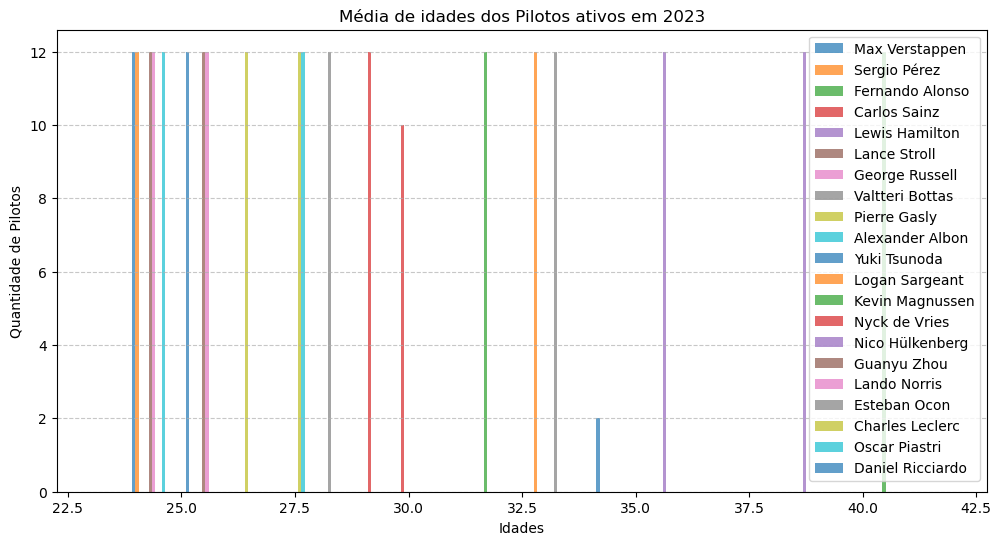

In [21]:
#aqui é como foi feito o gráfico de barras
plt.figure(figsize=(12, 6))
plt.hist(ages_by_driver, bins=10, alpha=0.7, label=unique_drivers)
plt.xlabel('Idades')
plt.ylabel('Quantidade de Pilotos')
plt.title('Média de idades dos Pilotos ativos em 2023')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Aqui nós podemos definir também que a idade média dos pilotos de F1 é de 26 anos.



# No próximo passo iremos mostrar os países mais comuns de nacionalidade dos pilotos de F1: 

In [48]:

piloto_country = ds.groupby('país').Piloto_nome.nunique().reset_index() 
piloto_country1 = piloto_country[piloto_country.Piloto_nome >= 30].sort_values('Piloto_nome' ,ascending = False )
piloto_country1.loc[len(piloto_country1.index)] = ['Others', (piloto_country.Piloto_nome.sum() - piloto_country1.Piloto_nome.sum())]

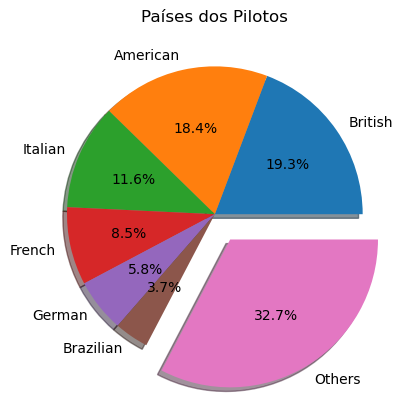

In [50]:
#Aqui apenas o plot do gráfico de pizza ou "pie", usando a biblioteca matplotlib

plt.title('Países dos Pilotos')
pizza = [0,0,0,0,0,0,0.2]
plt.pie(piloto_country1.Piloto_nome, labels= driver_country1.país, autopct='%1.1f%%', explode= pizza, shadow=True, startangle=360 );

# Os pilotos da Europa são a maioria na F1, representando cerca de 70% dos pilotos. 